<a href="https://colab.research.google.com/github/Siddhartha17-git/DAV-Project/blob/main/DAV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load dataset
file_path = "data.csv"
df = pd.read_csv(file_path)
# Display basic info
print("SHAPE",df.shape)
print("COLUMNS",df.columns)
print(df.head())

SHAPE (14644, 47)
COLUMNS Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')
          Dis No  Year  Seq Glide Disaster Group Disaster Subgroup  \
0  1970-0013-ARG  1970   13   NaN        Natural      Hydrological   
1  1970-0109-AUS  197

In [55]:
print(df.describe())

# Count of unique disaster types
print(df['Disaster Type'].value_counts())

# Unique countries affected
print("Number of unique countries affected:", df['Country'].nunique())

               Year           Seq  Aid Contribution  Dis Mag Value  \
count  14644.000000  14644.000000      6.770000e+02   4.569000e+03   
mean    2001.596422    731.604958      1.254136e+05   5.093532e+04   
std       12.538572   1912.021531      2.997875e+06   3.211007e+05   
min     1970.000000      1.000000      1.000000e+00  -5.700000e+01   
25%     1993.000000    130.000000      1.750000e+02   7.000000e+00   
50%     2003.000000    304.000000      7.210000e+02   1.800000e+02   
75%     2012.000000    503.000000      3.511000e+03   1.515000e+04   
max     2021.000000   9881.000000      7.800000e+07   1.302587e+07   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  14644.000000  14376.000000  11577.000000  14644.000000  14095.000000   
mean    2001.606323      6.411241     15.207912   2001.655763      6.549273   
std       12.535872      3.393997      8.964592     12.537387      3.351351   
min     1970.000000      1.000000      1.000000   197

In [56]:
# Filling numerical missing values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Filling categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled successfully!")


Missing values handled successfully!


In [57]:
# Total deaths stats
total_deaths = df['Total Deaths']
print("Mean Deaths:", np.mean(total_deaths))
print("Median Deaths:", np.median(total_deaths))
print("Standard Deviation:", np.std(total_deaths))
print()
# Most affected country by total deaths
most_affected = df.groupby('Country')['Total Deaths'].sum().idxmax()
print("Country with highest disaster deaths:", most_affected)
most = df.groupby('Country')['Total Deaths'].sum()
top_20 = most.sort_values(ascending=False).head(20)
print(top_20)

Mean Deaths: 256.845943731221
Median Deaths: 16.0
Standard Deviation: 5422.463652339478

Country with highest disaster deaths: Bangladesh
Country
Bangladesh                            531129.0
China                                 461400.0
Ethiopia                              415147.0
Haiti                                 242293.0
Indonesia                             206646.0
India                                 205787.0
Sudan (the)                           162807.0
Myanmar                               140761.0
Iran (Islamic Republic of)            112022.0
Mozambique                            107369.0
Pakistan                              100424.0
Peru                                   87578.0
Philippines (the)                      63725.0
Russian Federation (the)               62961.0
Somalia                                50319.0
Sri Lanka                              40020.0
Japan                                  33179.0
Colombia                               32531.0
Turkey  

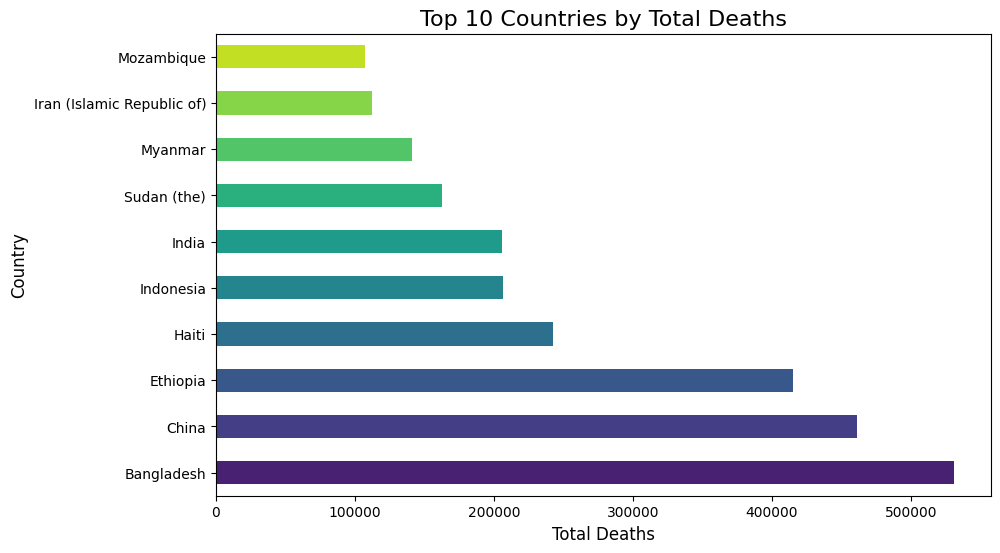

In [58]:
import seaborn as sns
sns.set_palette("viridis")
# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=sns.color_palette("viridis", len(top_10)))
plt.title('Top 10 Countries by Total Deaths', fontsize=16)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

<ipython-input-67-489a059fafe4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Disaster Type'].value_counts().index[:10],


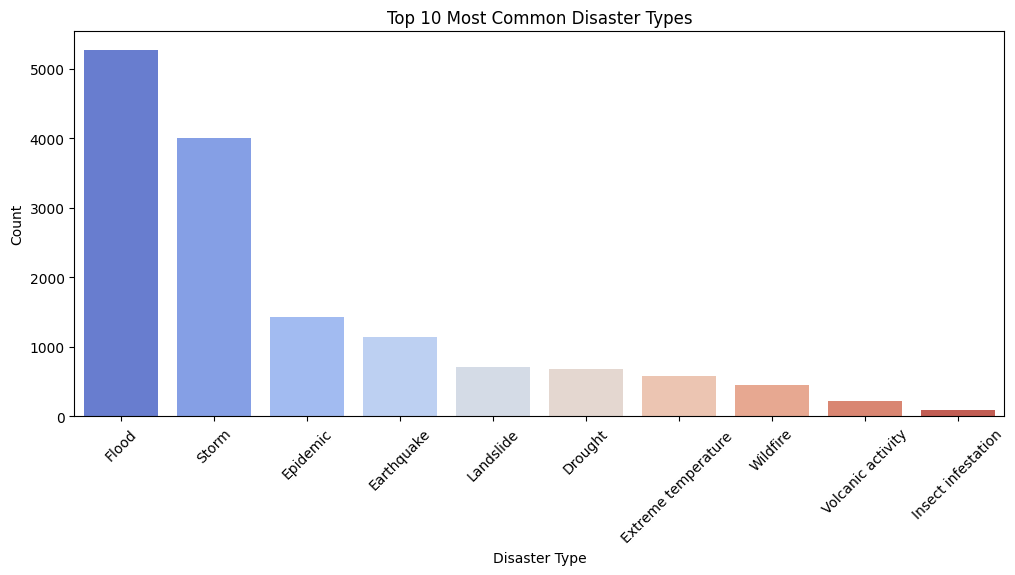

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(x=df['Disaster Type'].value_counts().index[:10],
            y=df['Disaster Type'].value_counts().values[:10],
            palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.show()

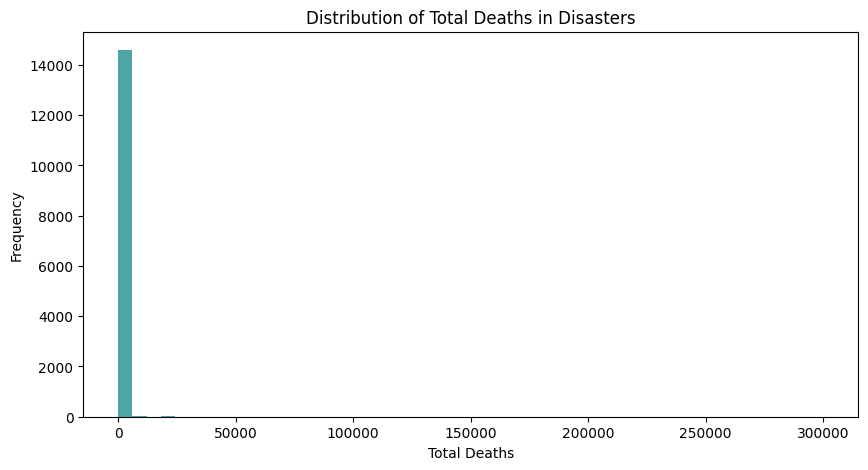

In [60]:
plt.figure(figsize=(10,5))
plt.hist(df['Total Deaths'], bins=50, color='teal', alpha=0.7)
plt.xlabel("Total Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of Total Deaths in Disasters")
plt.show()


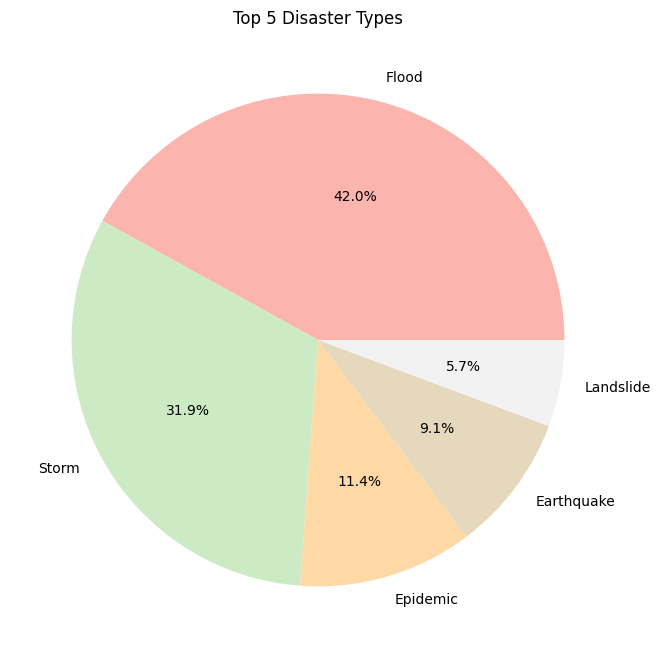

In [61]:
df['Disaster Type'].value_counts().head(5).plot.pie(autopct='%1.1f%%', figsize=(8,8), cmap='Pastel1')
plt.title("Top 5 Disaster Types")
plt.ylabel('')
plt.show()

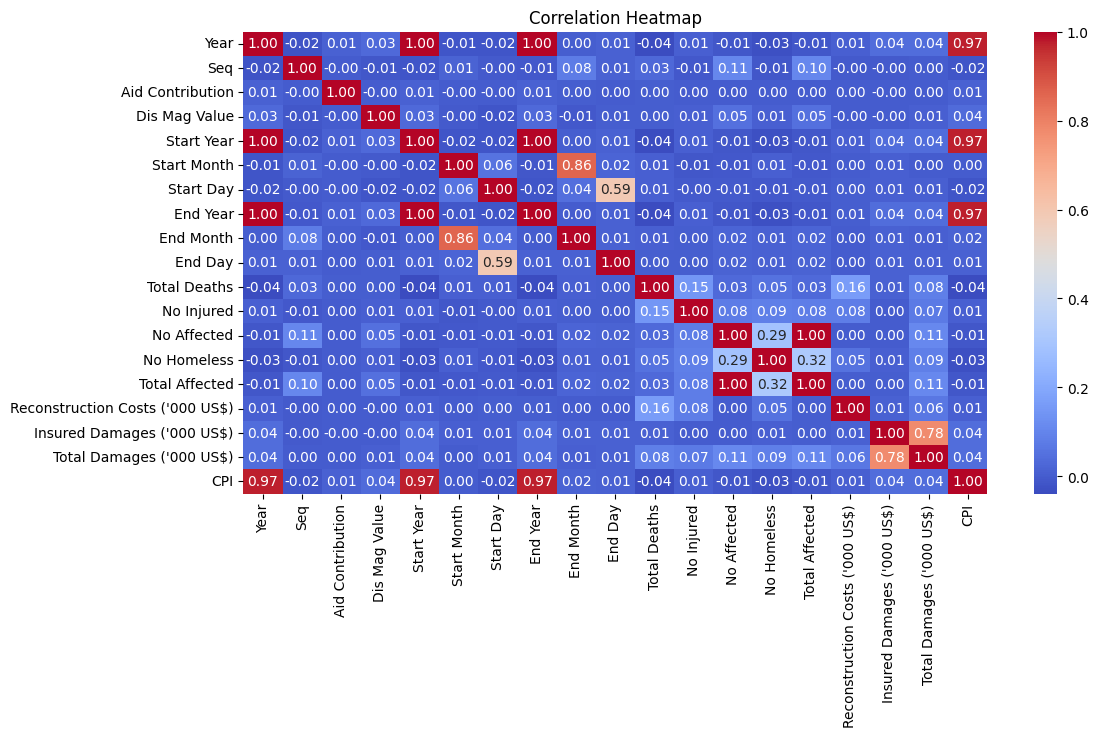

In [62]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

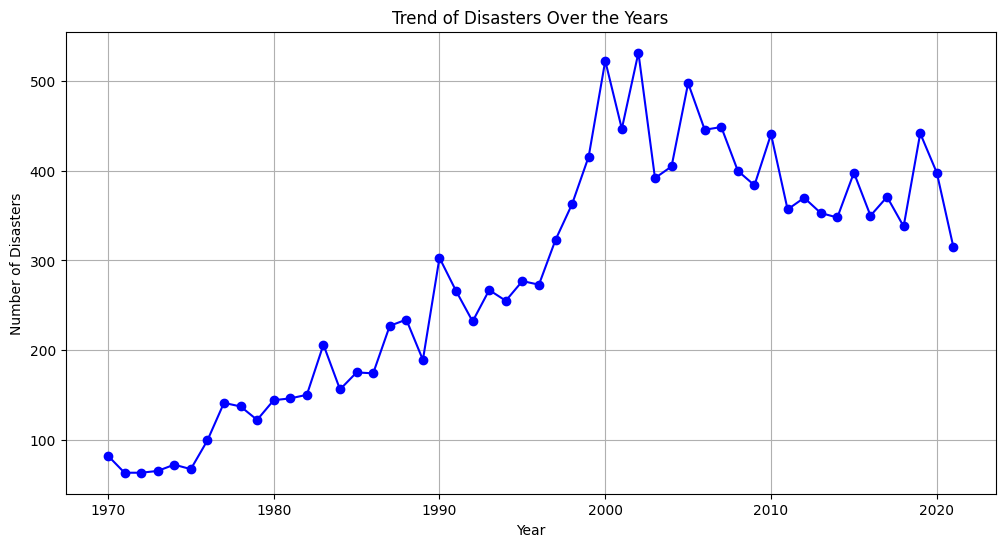

In [63]:
plt.figure(figsize=(12,6))
df.groupby("Year").size().plot(kind="line", marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trend of Disasters Over the Years")
plt.grid()
plt.show()


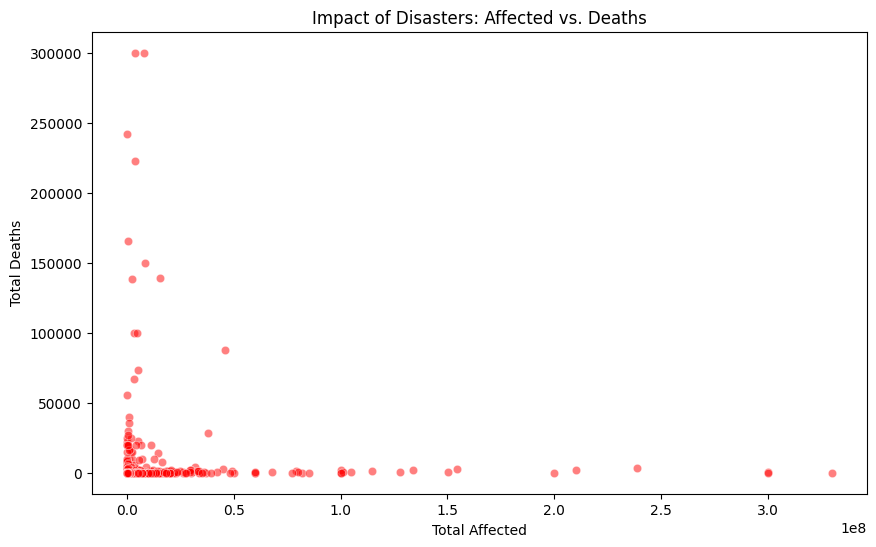

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Total Affected"], y=df["Total Deaths"], alpha=0.5, color='red')
plt.xlabel("Total Affected")
plt.ylabel("Total Deaths")
plt.title("Impact of Disasters: Affected vs. Deaths")
plt.show()
